# Census Data Analytics - 2nd version

### by Paulo C. Rios, Jr. | Sep 21, 2017 | Updated: Oct 24, 2017

#### Contents

1. Data Importing and Reading
2. Data Preprocessing
3. Feature Visualization and Transformation
4. Model Training and Performance Measurement 

Update: Model training is predictive of income higher of 50k

## 1. Data Importing and Reading

In [1]:
import urllib.request

In [2]:
url_adr = "http://archive.ics.uci.edu/ml/datasets/Census+Income"

In [3]:
url_file ="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/"
data_file = "adult.data"

In [4]:
full_url = url_file + data_file

In [5]:
full_url

'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
local_file_name = "adult.data"

In [7]:
urllib.request.urlretrieve(full_url, local_file_name)

('adult.data', <http.client.HTTPMessage at 0x10236a5c0>)

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(local_file_name, na_values = " ?")

## 2. Data Preprocessing

## 2.1 Data Check

In [6]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
data.shape

(32560, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        30724 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     30717 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    31977 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 2.2 Renaming Columns

In [10]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [11]:
data.columns = data.columns.str.strip()

In [12]:
data.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [13]:
new_columns = ["Age", "Work Class", "Final Weight", "Education", 
               "Education Num", "Marital Status", "Occupation", 
               "Relationship", "Race", "Sex", "Capital Gain", 
               "Capital Loss","Hours per Week", "Native Country",
               "<=50K"]

In [14]:
data.columns = new_columns

## 2.3 Target Feature

In [15]:
data["<=50K"].value_counts()

 <=50K    24719
 >50K      7841
Name: <=50K, dtype: int64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

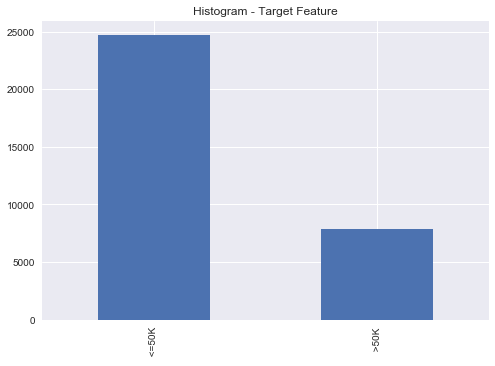

In [17]:
data["<=50K"].value_counts().plot(kind = "bar")
plt.title("Histogram - Target Feature")
plt.show()

In [18]:
data["<=50K"] = data["<=50K"].str.strip()

In [19]:
boolean_dict = {"<=50K": False, ">50K": True}

In [20]:
data["<=50K"] = data["<=50K"].map(boolean_dict)
data["<=50K"].value_counts()

False    24719
True      7841
Name: <=50K, dtype: int64

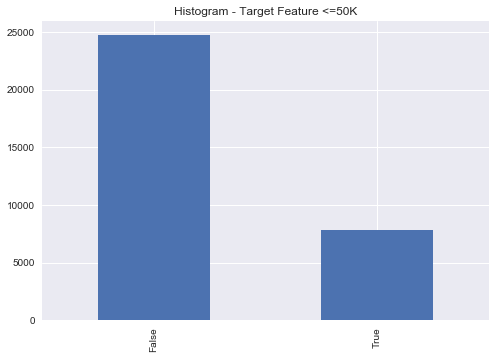

In [21]:
data["<=50K"].value_counts().plot(kind = "bar")
plt.title("Histogram - Target Feature <=50K")
plt.show()

## 2.4 Searching for and Removing Null Values

In [22]:
data.isnull().any()

Age               False
Work Class         True
Final Weight      False
Education         False
Education Num     False
Marital Status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital Gain      False
Capital Loss      False
Hours per Week    False
Native Country     True
<=50K             False
dtype: bool

#### Drop the rows where any of the elements are null values:

In [23]:
data.dropna(how = "any" , inplace = True)

In [24]:
data.shape

(30161, 15)

## 3. Feature Visualization and Transformation

## 3.1 Categorical Features

In [25]:
from sklearn.preprocessing import LabelBinarizer

In [26]:
encoder = LabelBinarizer()

### Education

In [27]:
data["Education"].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64

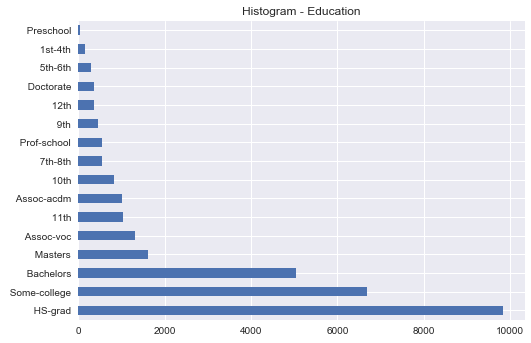

In [28]:
data["Education"].value_counts().plot(kind = "barh")
plt.title("Histogram - Education")
plt.show()

In [29]:
education_cat = data["Education"]
education_cat_1hot = encoder.fit_transform(education_cat)
education_cat_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Marital Status

In [30]:
data["Marital Status"].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

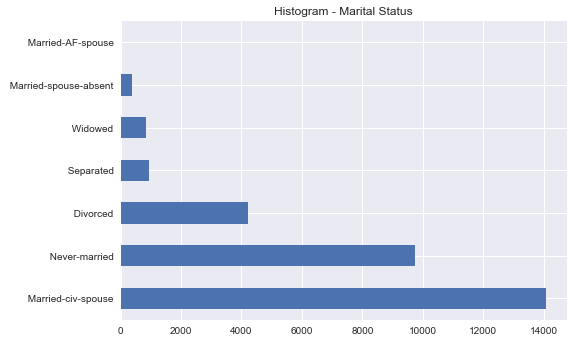

In [31]:
data["Marital Status"].value_counts().plot(kind = "barh")
plt.title("Histogram - Marital Status")
plt.show()

In [32]:
marital_status_cat = data["Marital Status"]
marital_status_cat_1hot = encoder.fit_transform(marital_status_cat)
marital_status_cat_1hot

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

### Work Class

In [33]:
data["Work Class"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Work Class, dtype: int64

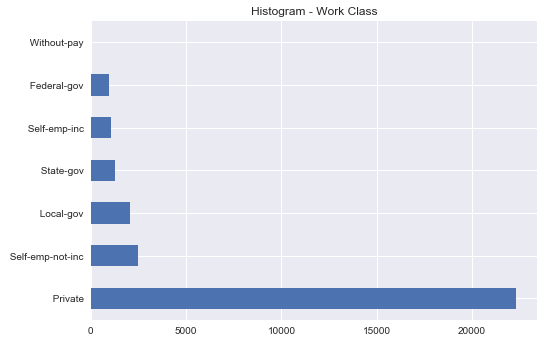

In [34]:
data["Work Class"].value_counts().plot(kind = "barh")
plt.title("Histogram - Work Class")
plt.show()

In [35]:
workclass_cat = data["Work Class"]
workclass_cat_1hot = encoder.fit_transform(workclass_cat)
workclass_cat_1hot

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Occupation

In [36]:
data["Occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

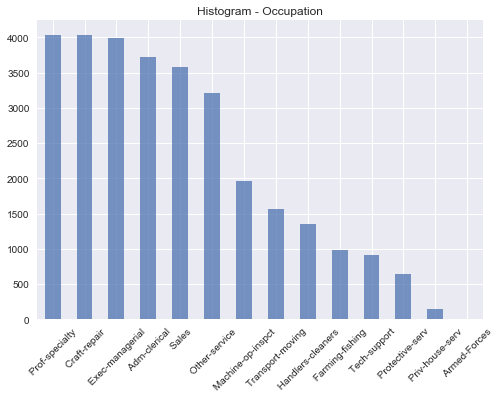

In [37]:
data["Occupation"].value_counts().plot(kind = "bar", alpha=0.75, rot=45)
plt.title("Histogram - Occupation")
plt.show()

In [38]:
occupation_cat = data["Occupation"]
occupation_cat_1hot = encoder.fit_transform(occupation_cat)
occupation_cat_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Relationship

In [39]:
data["Relationship"].value_counts()

 Husband           12463
 Not-in-family      7725
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

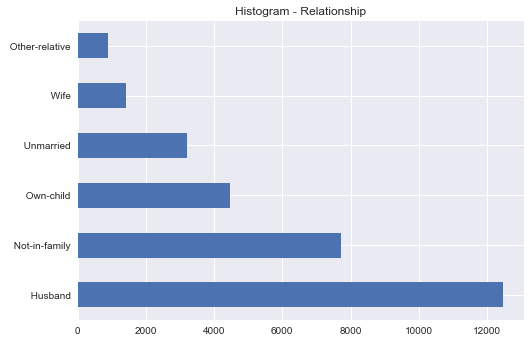

In [40]:
data["Relationship"].value_counts().plot(kind = "barh")
plt.title("Histogram - Relationship")
plt.show()

In [41]:
relationship_cat = data["Relationship"]
relationship_cat_1hot = encoder.fit_transform(relationship_cat)
relationship_cat_1hot

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]])

### Race

In [42]:
data["Race"].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

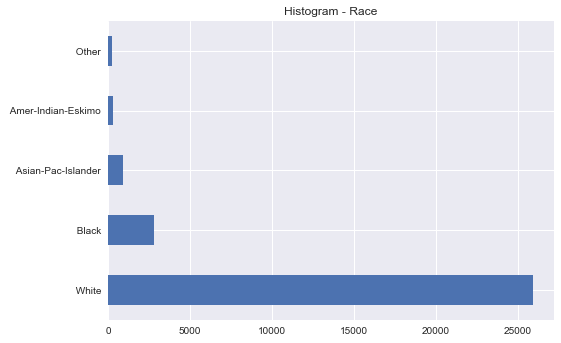

In [43]:
data["Race"].value_counts().plot(kind = "barh")
plt.title("Histogram - Race")
plt.show()

In [44]:
race_cat = data["Race"]
race_cat_1hot = encoder.fit_transform(race_cat)
race_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ..., 
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

### Sex

In [45]:
data["Sex"].value_counts()

 Male      20379
 Female     9782
Name: Sex, dtype: int64

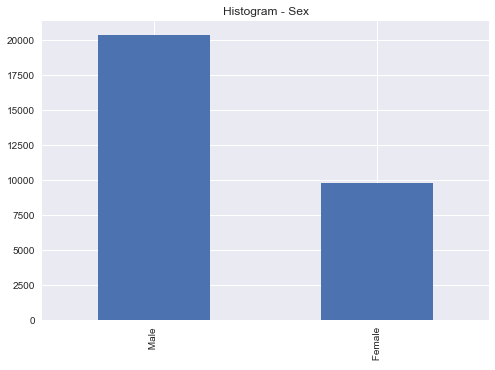

In [46]:
data["Sex"].value_counts().plot(kind = "bar")
plt.title("Histogram - Sex")
plt.show()

In [47]:
sex_cat = data["Sex"]
sex_cat_1hot = encoder.fit_transform(sex_cat)
sex_cat_1hot

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [1],
       [0]])

### Native Country

In [48]:
data["Native Country"] = data["Native Country"].str.strip()

In [49]:
data["Native Country"].value_counts()

United-States                 27503
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

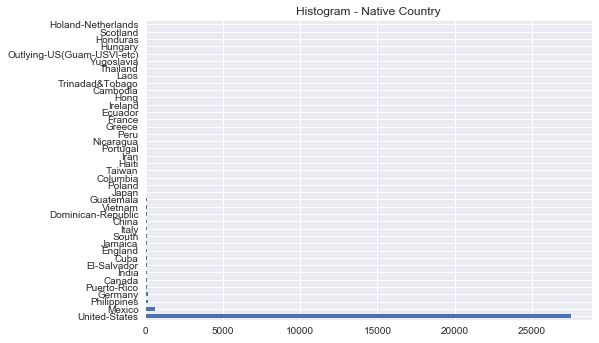

In [50]:
data["Native Country"].value_counts().plot(kind = "barh")
plt.title("Histogram - Native Country")
plt.show()

In [51]:
native_country_cat = data["Native Country"]
native_country_cat_1hot = encoder.fit_transform(native_country_cat)
native_country_cat_1hot

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

## 3.2 Numerical Features

In [52]:
import numpy as np

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
std_scaler =  StandardScaler()

#### Correlation matrix with numerical features

In [55]:
corr_matrix = data.corr()

In [56]:
corr_matrix["<=50K"].sort_values(ascending = True)

Final Weight     -0.008978
Capital Loss      0.150050
Capital Gain      0.221200
Hours per Week    0.229480
Age               0.242000
Education Num     0.335317
<=50K             1.000000
Name: <=50K, dtype: float64

### Age

In [57]:
data["Age"].describe()

count    30161.000000
mean        38.437883
std         13.134882
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64

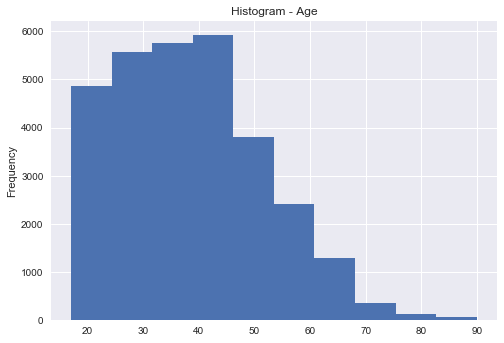

In [58]:
data["Age"].plot(kind = "hist")
plt.title("Histogram - Age")
plt.show()

In [59]:
age_num =  data["Age"].astype(np.float64).values.reshape(-1, 1)
age_num_scaled = std_scaler.fit_transform(age_num)
age_num_scaled

array([[ 0.880275  ],
       [-0.03333799],
       [ 1.10867824],
       ..., 
       [ 1.48935032],
       [-1.25148865],
       [ 1.03254383]])

### Education Num

In [60]:
data["Education Num"].describe()

count    30161.000000
mean        10.121216
std          2.549983
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: Education Num, dtype: float64

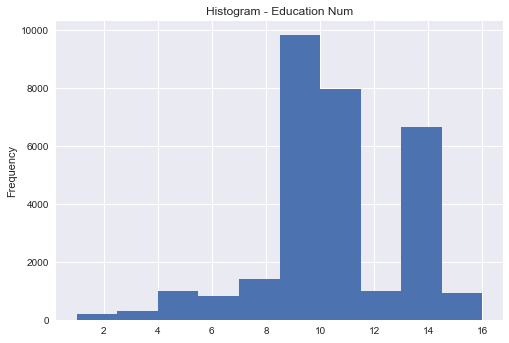

In [61]:
data["Education Num"].plot(kind = "hist")
plt.title("Histogram - Education Num")
plt.show()

In [62]:
education_num =  data["Education Num"].astype(np.float64).values.reshape(-1, 1)
education_num_scaled = std_scaler.fit_transform(education_num)
education_num_scaled

array([[ 1.12896095],
       [-0.43970277],
       [-1.22403463],
       ..., 
       [-0.43970277],
       [-0.43970277],
       [-0.43970277]])

### Final Weight

In [63]:
data["Final Weight"].describe()

count    3.016100e+04
mean     1.897976e+05
std      1.056527e+05
min      1.376900e+04
25%      1.176280e+05
50%      1.784290e+05
75%      2.376300e+05
max      1.484705e+06
Name: Final Weight, dtype: float64

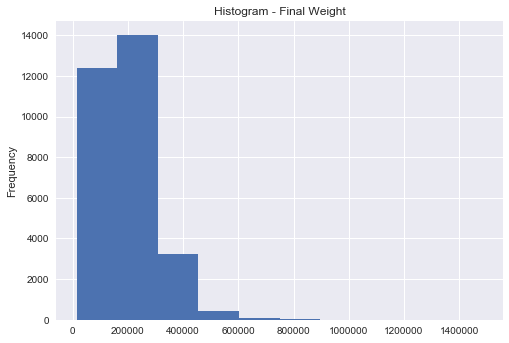

In [64]:
data["Final Weight"].plot(kind = "hist")
plt.title("Histogram - Final Weight")
plt.show()

In [65]:
final_weight_num =  data["Final Weight"].astype(np.float64).values.reshape(-1, 1)
final_weight_num_scaled = std_scaler.fit_transform(final_weight_num)
final_weight_num_scaled

array([[-1.00790871],
       [ 0.24465878],
       [ 0.42520607],
       ..., 
       [-0.35861051],
       [ 0.11067045],
       [ 0.92880758]])

### Capital Gain

In [66]:
data["Capital Gain"].describe()

count    30161.000000
mean      1091.971984
std       7406.466659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

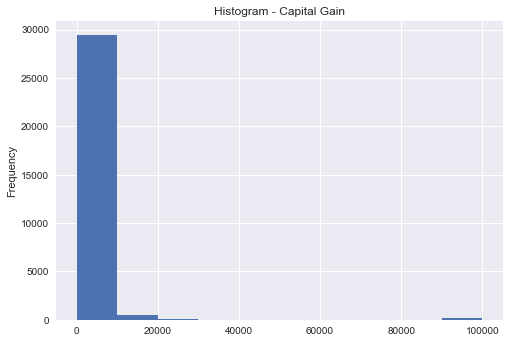

In [67]:
data["Capital Gain"].plot(kind = "hist")
plt.title("Histogram - Capital Gain")
plt.show()

In [68]:
capital_gain_num =  data["Capital Gain"].astype(np.float64).values.reshape(-1, 1)
capital_gain_num_scaled = std_scaler.fit_transform(capital_gain_num)
capital_gain_num_scaled

array([[-0.14743739],
       [-0.14743739],
       [-0.14743739],
       ..., 
       [-0.14743739],
       [-0.14743739],
       [ 1.88109386]])

### Capital Loss

In [69]:
data["Capital Loss"].describe()

count    30161.000000
mean        88.375419
std        404.304753
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64

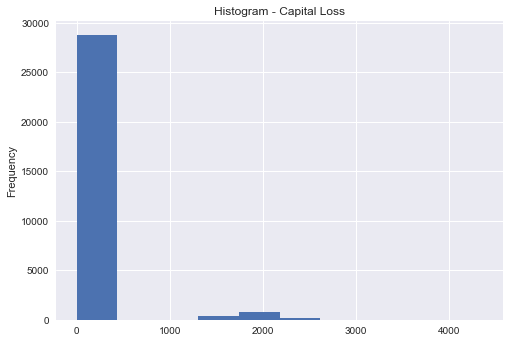

In [70]:
data["Capital Loss"].plot(kind = "hist")
plt.title("Histogram - Capital Loss")
plt.show()

In [71]:
capital_loss_num =  data["Capital Loss"].astype(np.float64).values.reshape(-1, 1)
capital_loss_num_scaled = std_scaler.fit_transform(capital_loss_num)
capital_loss_num_scaled

array([[-0.21858977],
       [-0.21858977],
       [-0.21858977],
       ..., 
       [-0.21858977],
       [-0.21858977],
       [-0.21858977]])

### Hours Per Week

In [72]:
data["Hours per Week"].describe()

count    30161.000000
mean        40.931269
std         11.980182
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours per Week, dtype: float64

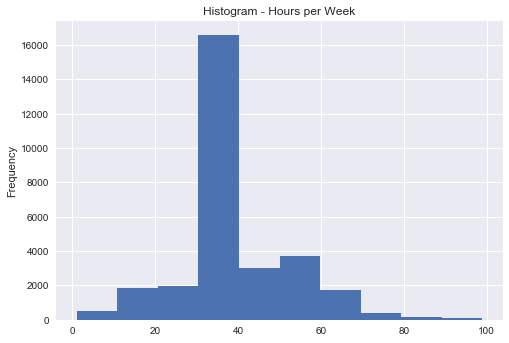

In [73]:
data["Hours per Week"].plot(kind = "hist")
plt.title("Histogram - Hours per Week")
plt.show()

In [74]:
hours_per_week_num =  data["Hours per Week"].astype(np.float64).values.reshape(-1, 1)
hours_per_week_num_scaled = std_scaler.fit_transform(hours_per_week_num)
hours_per_week_num_scaled

array([[-2.33149486],
       [-0.07773541],
       [-0.07773541],
       ..., 
       [-0.07773541],
       [-1.74718685],
       [-0.07773541]])

### Putting all together

In [75]:
X_train_columns = [education_cat_1hot, marital_status_cat_1hot,
            workclass_cat_1hot, occupation_cat_1hot,
            relationship_cat_1hot, race_cat_1hot,
            sex_cat_1hot, native_country_cat_1hot,
            age_num_scaled, education_num_scaled,
            final_weight_num_scaled, capital_gain_num_scaled,
            capital_loss_num_scaled, hours_per_week_num_scaled
            ]

In [76]:
X_train = np.hstack(X_train_columns)   

In [77]:
y_train = data["<=50K"]

# 4. Model Training and Performance Measurement

In [78]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

## 4.1 Training with Random Forests

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
forest_clf = RandomForestClassifier(random_state = 17)

In [82]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=17,
            verbose=0, warm_start=False)

In [83]:
cv_scores_forest = cross_val_score(forest_clf, X_train, y_train, 
                                   cv=3, scoring="accuracy")
cv_scores_forest

array([ 0.84523573,  0.84105829,  0.84959714])

### Confusion Matrix - Random Forest

In [84]:
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [85]:
confusion_matrix(y_train, y_train_forest_pred)

array([[21076,  1577],
       [ 3089,  4419]])

### Precision and Recall - Random Forest 

In [86]:
precision_score_forest = precision_score(y_train, y_train_forest_pred)
precision_score_forest

0.73699132755170116

In [87]:
recall_score_forest = recall_score(y_train, y_train_forest_pred)
recall_score_forest

0.58857218966435798

In [88]:
f1_score_forest = f1_score(y_train, y_train_forest_pred)
f1_score_forest

0.65447274881516582

In [89]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                 method="predict_proba")

In [90]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

### Decision Threshold and Precision/Recall Tradeoff - Random Forest

In [91]:
# precision_forest, recall_forest, thresholds_forest
p_forest, r_forest, t_forest =  precision_recall_curve(y_train, y_scores_forest)


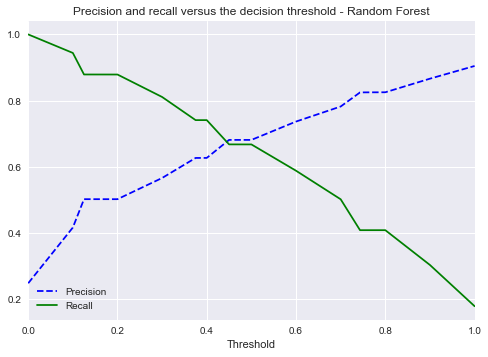

In [92]:
plt.plot(t_forest, p_forest[:-1], 
         "b--", label="Precision") 
plt.plot(t_forest, r_forest[:-1], 
         "g-", label="Recall") 
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title("Precision and recall versus the decision threshold - Random Forest")
plt.xlim([0, 1])
plt.show()

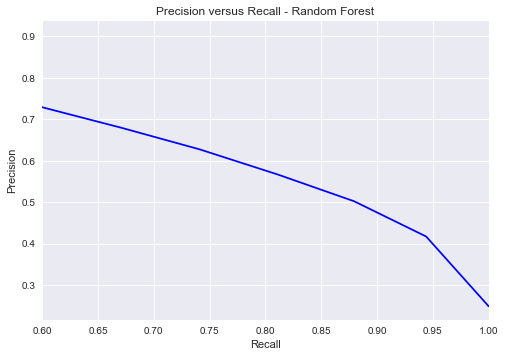

In [93]:
plt.plot(r_forest[:-1], p_forest[:-1], "b-")  
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision versus Recall - Random Forest")
plt.xlim([0.6, 1])
plt.show()

### ROC curve - Random Forest

In [94]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,
                                                      y_scores_forest)

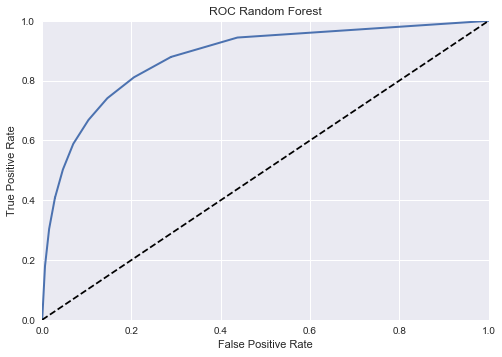

In [95]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest") 
plt.plot([0, 1], [0, 1], 'k--') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Random Forest")
plt.show()

In [96]:
roc_auc_score_forest = roc_auc_score(y_train, y_scores_forest)
roc_auc_score_forest

0.87841989277859345

## 4.2 Training with Stochastic Gradient Descent (SGD)

In [97]:
from sklearn.linear_model import SGDClassifier

In [98]:
sgd_clf = SGDClassifier(random_state=17)

In [99]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=17, shuffle=True, verbose=0,
       warm_start=False)

In [100]:
cv_scores_sgd = cross_val_score(sgd_clf, X_train, y_train, 
                                cv=3, scoring="accuracy")
cv_scores_sgd

array([ 0.81659041,  0.8380744 ,  0.84442455])

### Confusion Matrix - SGD

In [101]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [102]:
confusion_matrix(y_train, y_train_pred_sgd)

array([[20540,  2113],
       [ 2923,  4585]])

### Precision and Recall - SGD

In [103]:
precision_score_sgd = precision_score(y_train, y_train_pred_sgd)
precision_score_sgd

0.68453269632726188

In [104]:
recall_score_sgd = recall_score(y_train, y_train_pred_sgd)
recall_score_sgd

0.6106819392647842

In [105]:
f1_score_sgd = f1_score(y_train, y_train_pred_sgd)
f1_score_sgd

0.64550190060537793

In [106]:
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                                 method="decision_function")

### Decision Threshold and Precision/Recall Tradeoff - SGD

In [107]:
# precision_sgd, recall_sgd, thresholds_sgd
p_sgd, r_sgd, t_sgd =  precision_recall_curve(y_train, y_scores_sgd)

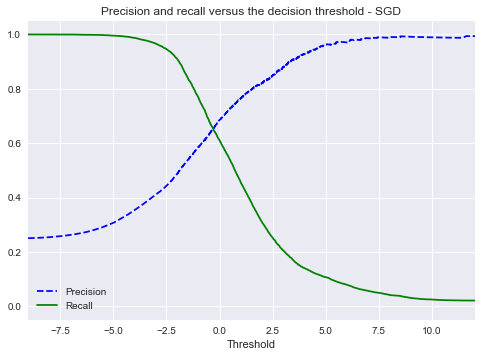

In [111]:
plt.plot(t_sgd, p_sgd[:-1], 
         "b--", label="Precision") 
plt.plot(t_sgd, r_sgd[:-1], 
         "g-", label="Recall") 
plt.xlabel("Threshold")
plt.title("Precision and recall versus the decision threshold - SGD")
plt.legend(loc="lower left")
# plt.ylim([0, 1])
plt.xlim([-9, 12])
plt.show()

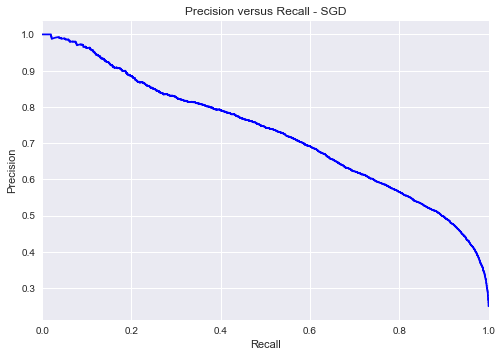

In [112]:
plt.plot(r_sgd[:-1], p_sgd[:-1], "b-")  
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision versus Recall - SGD")
plt.xlim([0, 1])
plt.show()

### ROC Curve - SGD

In [113]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores_sgd)

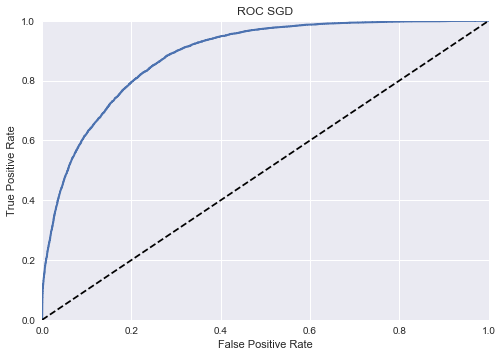

In [114]:
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="SGD") 
plt.plot([0, 1], [0, 1], 'k--') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC SGD")
plt.show()

In [115]:
roc_auc_score_sgd = roc_auc_score(y_train, y_scores_sgd)
roc_auc_score_sgd

0.88563911733016065

##  4.3 Comparing - Random Forests and SGD ROC Curves

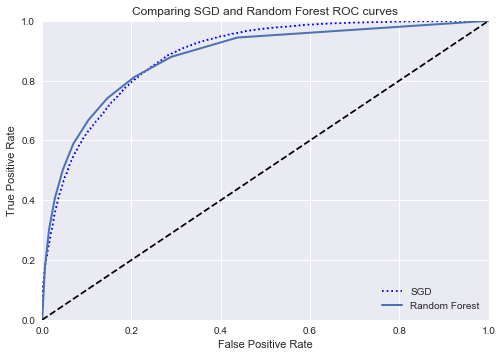

In [116]:
plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGD") 
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest") 
plt.plot([0, 1], [0, 1], 'k--') 
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Comparing SGD and Random Forest ROC curves")
plt.legend(loc="lower right")
plt.show()

In [117]:
roc_aus_scores = {"Random Forest": roc_auc_score_forest,
                 "SGD": roc_auc_score_sgd}
pd.DataFrame(roc_aus_scores, index = ["ROC AUC Scores"])

,Random Forest,SGD
ROC AUC Scores,0.87842,0.885639


In [118]:
confusion_matrix_scores = {"Random Forest": [precision_score_forest,
                                            recall_score_forest,
                                            f1_score_forest],
                          "SGD": [precision_score_sgd,
                                            recall_score_sgd,
                                            f1_score_sgd]
                           }
pd.DataFrame(confusion_matrix_scores, index = ["Precision Score",
                                      "Recall Score",
                                      "F1 Score"])

,Random Forest,SGD
Precision Score,0.736991,0.684533
Recall Score,0.588572,0.610682
F1 Score,0.654473,0.645502


In [119]:
accuracy_scores = {"Random Forest": list(cv_scores_forest),
                          "SGD": list(cv_scores_sgd)
                           }
pd.DataFrame(accuracy_scores, index = ["1st CV run",
                                      "2nd CV run",
                                      "3rd CV run"])

,Random Forest,SGD
1st CV run,0.845236,0.816590
2nd CV run,0.841058,0.838074
3rd CV run,0.849597,0.844425


## 5. Next - To do

1. Remove outliers and check effect on performance measurements.
2. Choose best precision/recall tradeoff for best classifier.
3. Fine tune best classifier with Grid Search.
4. Perform data preprocessing and transformation on the test set.
5. Evaluate best classifier on the test set.